In [7]:
#http://www.aisoftwarellc.com/blog/post/digit-classification-with-tensorflow-and-the-mnist-dataset/2039

In [1]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import time

C:\Anaconda\lib\site-packages\h5py\__init__.py:36: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters


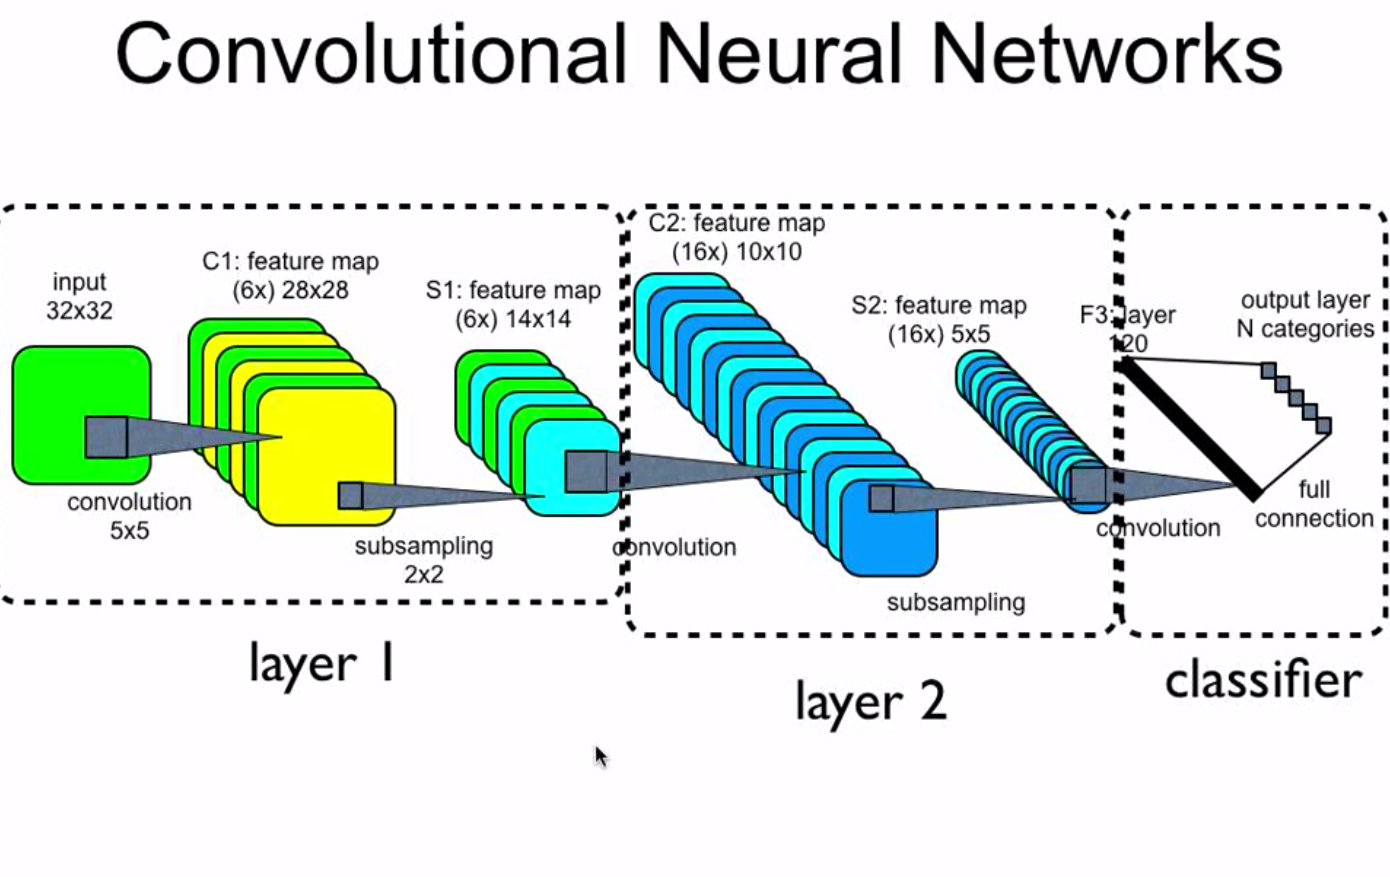

In [2]:
from IPython.display import Image
Image('C.png')

In [3]:
X = tf.placeholder(tf.float32, shape=(None, 28, 28, 1))
y = tf.placeholder(tf.int64, shape=(None), name="y")

In [4]:
filters = tf.Variable(tf.truncated_normal((5,5,1,32), stddev=0.1))
filters_2 = tf.Variable(tf.truncated_normal((5,5,32,64), stddev=0.1))

In [6]:
with tf.name_scope("dnn"):
    convolution = tf.nn.conv2d(X, filters, strides=[1,2,2,1], padding="SAME")
    max_pool = tf.nn.max_pool(convolution, ksize=[1,2,2,1], strides=[1,2,2,1], padding="VALID")
    convolution_2 = tf.nn.conv2d(max_pool, filters_2, strides=[1,2,2,1], padding="SAME")
    max_pool_2 = tf.nn.max_pool(convolution_2, ksize=[1,2,2,1], strides=[1,2,2,1], padding="VALID")
    flatten = tf.reshape(max_pool_2, [-1, 2 * 2 * 64])
    #predict = fully_connected(flatten, 1024, scope="predict")
    keep_prob = tf.placeholder(tf.float32)
    #dropout = tf.nn.dropout(predict, keep_prob)
    #logits = fully_connected(dropout, n_outputs, scope="outputs", activation_fn=None)

In [11]:
print("conv", convolution.get_shape())
print("max", max_pool.get_shape())
print("conv2", convolution_2.get_shape())
print("max2", max_pool_2.get_shape())
print("flat", flatten.get_shape())
#print("predict", predict.get_shape())
#print("dropout", dropout.get_shape())
#print("logits", logits.get_shape())
#print("logits guess", logits_guess.get_shape())
#print("correct", correct.get_shape())
#print("accuracy", accuracy.get_shape())

conv (?, 14, 14, 32)
max (?, 7, 7, 32)
conv2 (?, 4, 4, 64)
max2 (?, 2, 2, 64)
flat (?, 256)
